# Image Classification using CNNs

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os

In [83]:
#Import some packages to use
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

#To see our directory
import os
import random
import gc   #Gabage collector for cleaning deleted data from memory

In [84]:
from tensorflow.python.keras.models import Sequential

In [85]:
# CNN expects a fixed input image dimensions
# We will rescale all our images to 150x150
img_width, img_height = 22, 22 #can reduce image dimensions if model doesn't fit GPU memory

# Sepcify Train and Validation datasets path
train_data_dir = 'E:/chest-xray-pneumonia/chest_xray/train'
validation_data_dir = 'E:/chest-xray-pneumonia/chest_xray/val'
test_data_dir='E:/chest-xray-pneumonia/chest_xray/test'



# Specify number of train and validation samples, epochs, and batch size
nb_train_samples = 5216
nb_validation_samples = 16


epochs = 75     # We will keep epoch to 10 for quick training on Jupyterhub server, for better results use higher epoch
batch_size = 16 # The number of training examples in one forward/backward pass. 
                # The higher the batch size, the more memory space you'll need.

# Configure Keras input data format
    
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [86]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D

In [87]:
# Define CNN model
import tensorflow as tf
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [88]:
ADAM = Adam(lr=0.0001) #Optimiser

model.compile(loss='binary_crossentropy', 
              optimizer=ADAM,
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 20, 20, 32)        896       
_________________________________________________________________
activation_33 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
activation_34 (Activation)   (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 2, 2, 64)        

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In [89]:
# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# For test data, we will only use rescaling as dataset augmentation

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary') 

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary') 


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [90]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,    
    verbose =1)


Epoch 1/75
326/326 [==============================] - 126s 387ms/step - loss: 0.8206 - accuracy: 0.7345 - val_loss: 0.9256 - val_accuracy: 0.5000
Epoch 2/75
326/326 [==============================] - 96s 294ms/step - loss: 0.6798 - accuracy: 0.7437 - val_loss: 0.8391 - val_accuracy: 0.5000
Epoch 3/75
326/326 [==============================] - 87s 267ms/step - loss: 0.5734 - accuracy: 0.7694 - val_loss: 0.7416 - val_accuracy: 0.6250
Epoch 4/75
326/326 [==============================] - 98s 300ms/step - loss: 0.4740 - accuracy: 0.8317 - val_loss: 0.9979 - val_accuracy: 0.6250
Epoch 5/75
326/326 [==============================] - 117s 359ms/step - loss: 0.4173 - accuracy: 0.8526 - val_loss: 0.6615 - val_accuracy: 0.6250
Epoch 6/75
326/326 [==============================] - 117s 359ms/step - loss: 0.3923 - accuracy: 0.8635 - val_loss: 0.8416 - val_accuracy: 0.6250
Epoch 7/75
326/326 [==============================] - 145s 445ms/step - loss: 0.3652 - accuracy: 0.8750 - val_loss: 0.5916 - va

Epoch 57/75
326/326 [==============================] - 109s 334ms/step - loss: 0.2212 - accuracy: 0.9258 - val_loss: 0.6710 - val_accuracy: 0.6250
Epoch 58/75
326/326 [==============================] - 85s 260ms/step - loss: 0.2277 - accuracy: 0.9260 - val_loss: 0.4342 - val_accuracy: 0.8125
Epoch 59/75
326/326 [==============================] - 86s 264ms/step - loss: 0.2234 - accuracy: 0.9270 - val_loss: 0.4401 - val_accuracy: 0.8750
Epoch 60/75
326/326 [==============================] - 142s 435ms/step - loss: 0.2200 - accuracy: 0.9279 - val_loss: 0.4601 - val_accuracy: 0.7500
Epoch 61/75
326/326 [==============================] - 176s 539ms/step - loss: 0.2151 - accuracy: 0.9294 - val_loss: 0.5862 - val_accuracy: 0.6250
Epoch 62/75
326/326 [==============================] - 137s 421ms/step - loss: 0.2185 - accuracy: 0.9279 - val_loss: 0.5479 - val_accuracy: 0.6875
Epoch 63/75
326/326 [==============================] - 92s 282ms/step - loss: 0.2089 - accuracy: 0.9339 - val_loss: 0.60

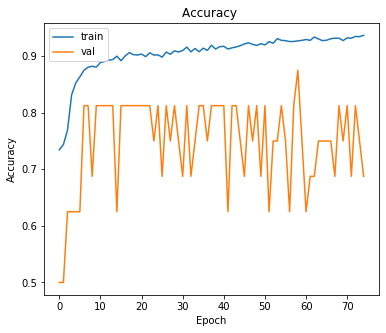

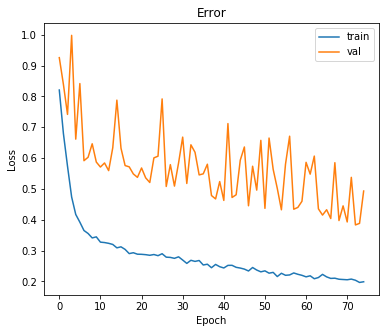

In [91]:
# Accuracy and Validation Graphs
plt.rcParams['figure.figsize'] = (6,5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title( "Accuracy ")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.close()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Error")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.close()

### Test-Normal

Normal:Correct: 212 mis-classified: 22
accuracy: 90.5982905982906


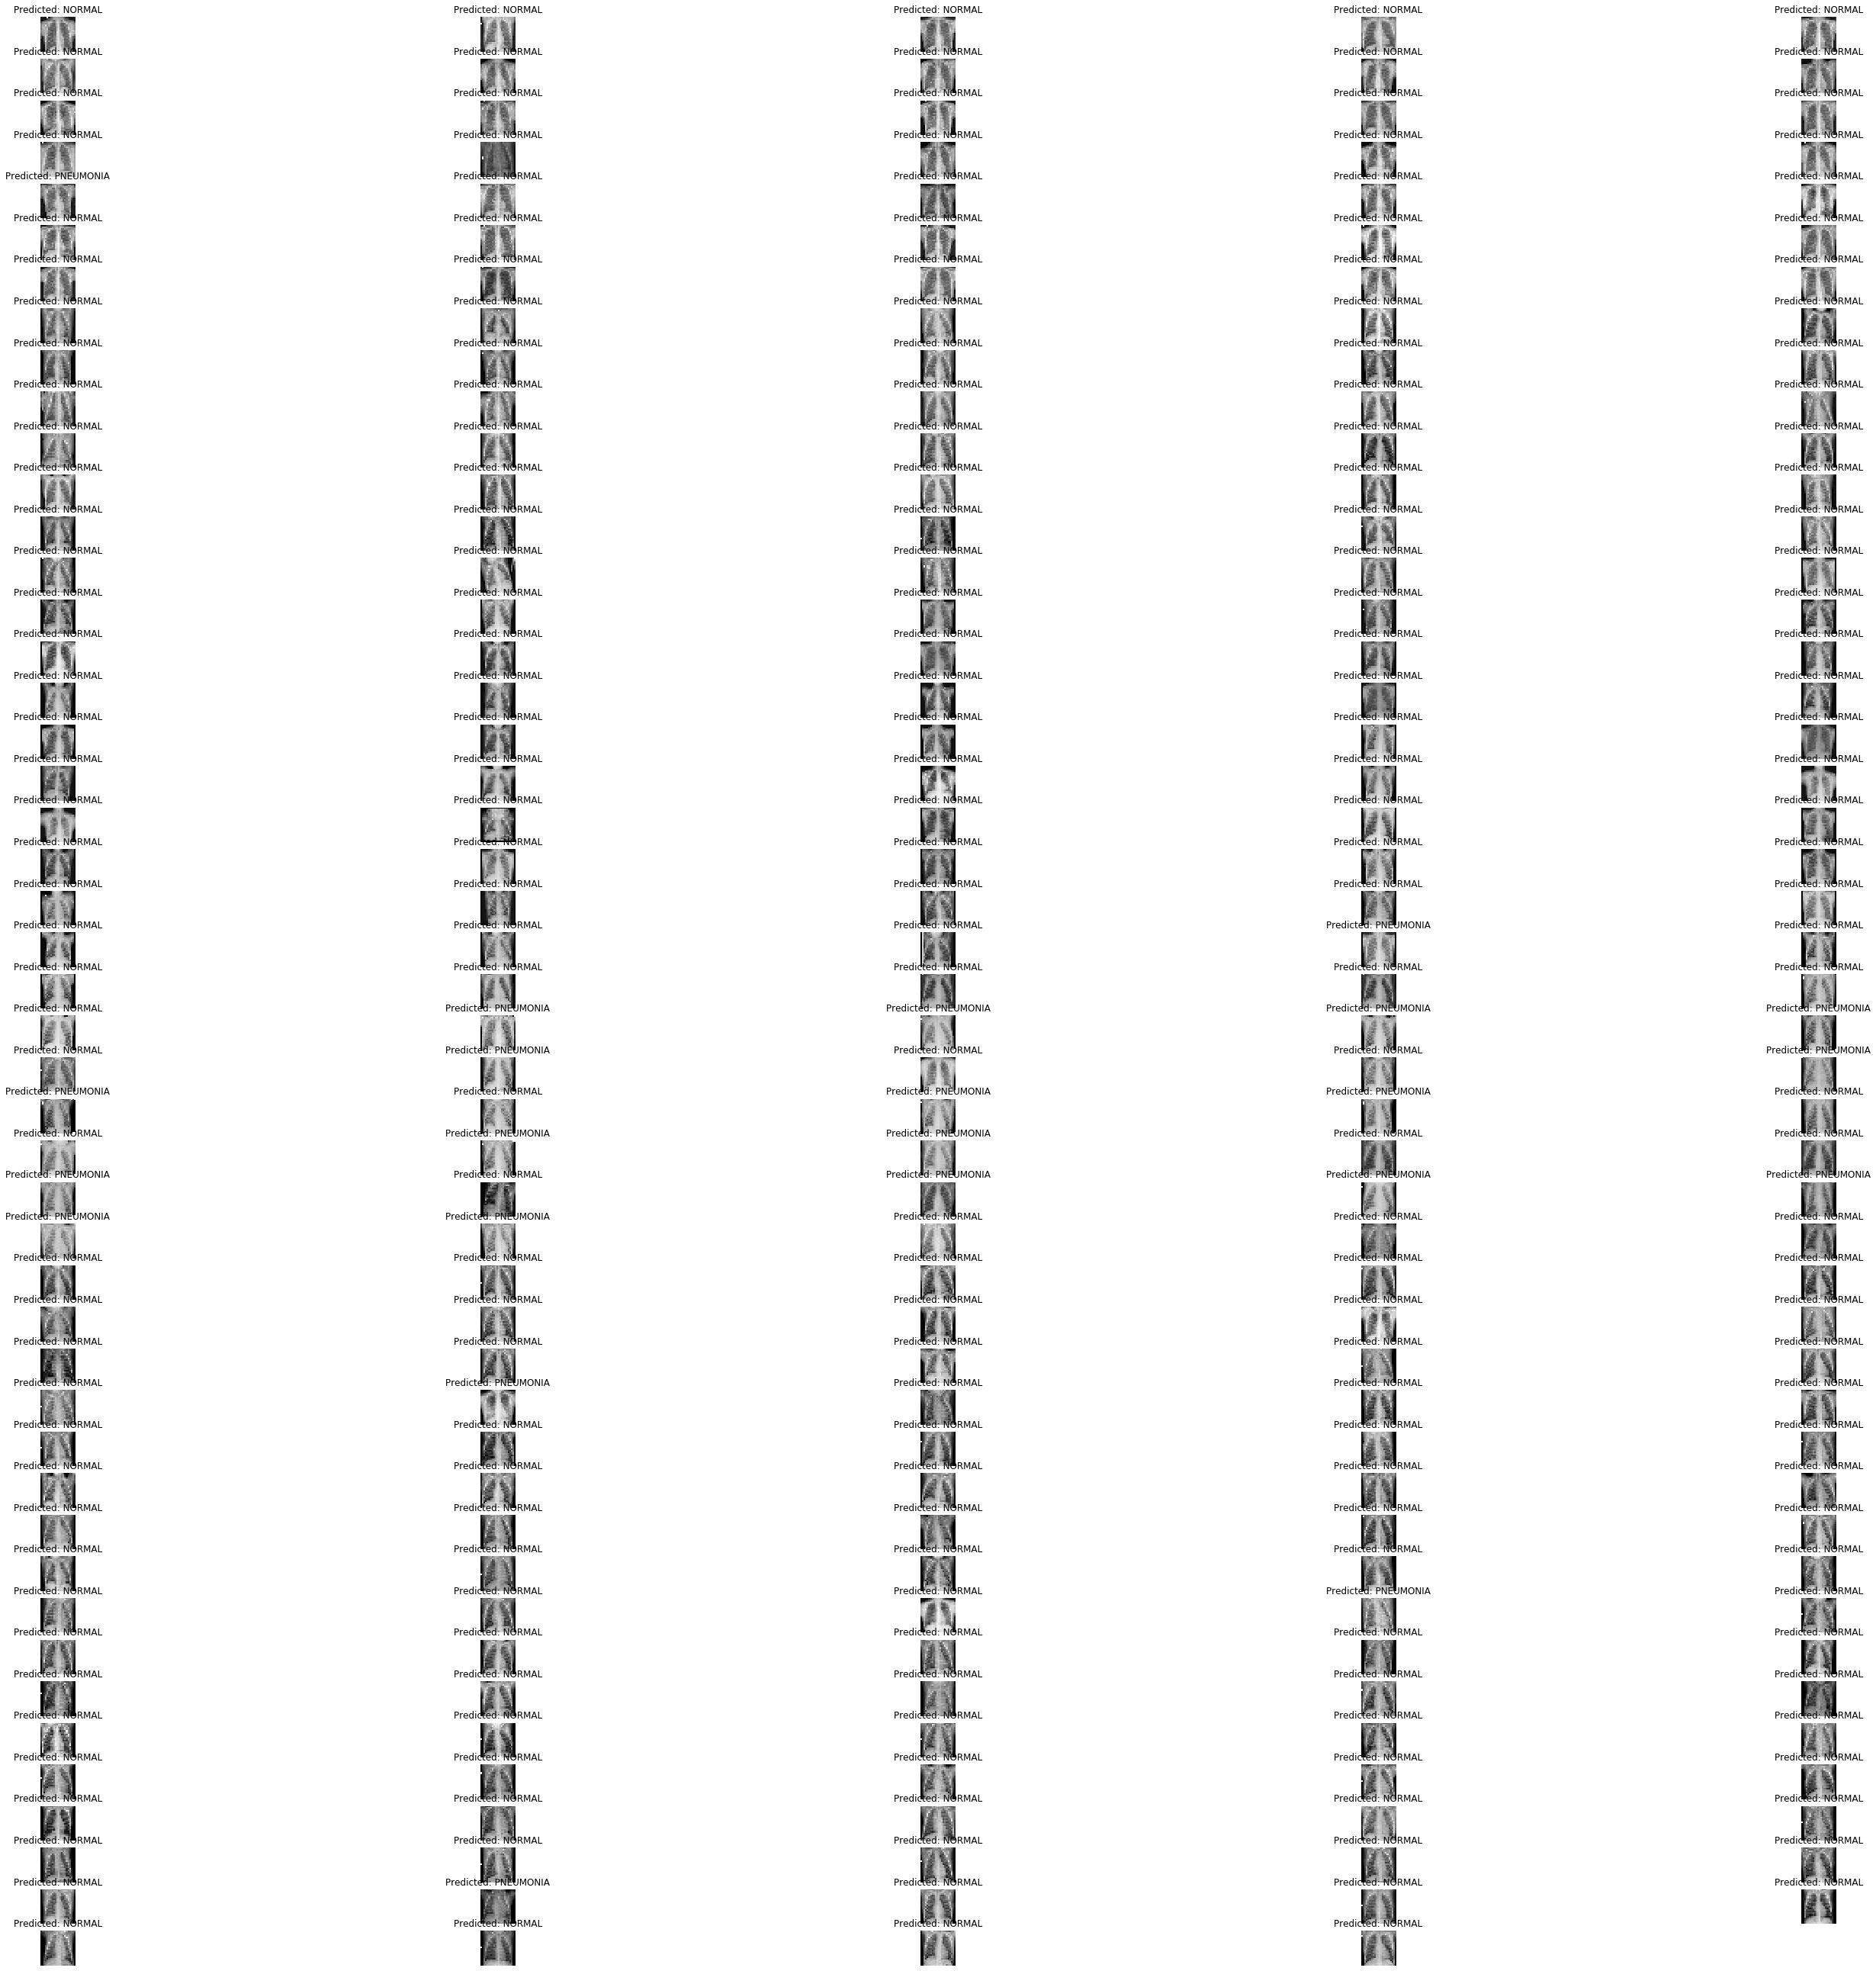

In [92]:
# Let's use our trained model to make some prediction on test examples

%matplotlib inline

plt.rcParams['figure.figsize'] = (50,50) # Make the figures a bit bigger
base_path = 'E:/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/'

classes = {0:'NORMAL', 1:'PNEUMONIA'} # Keras assigns integer ids (0,1,...) to class labels (Normal,pneumonia,...) alphabatecally
test_files = []
N=0;
P=0;
for x in os.listdir(base_path): 
    if (x.endswith('.jpeg')):
        test_files.append(x)
test_files.count

for i,x in enumerate(test_files):
    img = image.load_img(base_path + x, target_size=(img_width, img_height)) 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    output = model.predict(x)
    
    plt.subplot(50,5,i+1)
    plt.imshow(img)
    plt.title("Predicted: {}".format(classes[int(output[0][0])]))
    plt.axis('off')
    if classes[int(output[0][0])]== "NORMAL":
        N=N+1
    else:
        P=P+1
print("Normal:Correct:",N,"mis-classified:",P)
print("accuracy:",((N*100)/(N+P)))

### Test-Pneunomia Predictions

### Test-Pneunomia

PNEUMONIA:Correct 317 mis-classified: 73
accuracy: 81.28205128205128


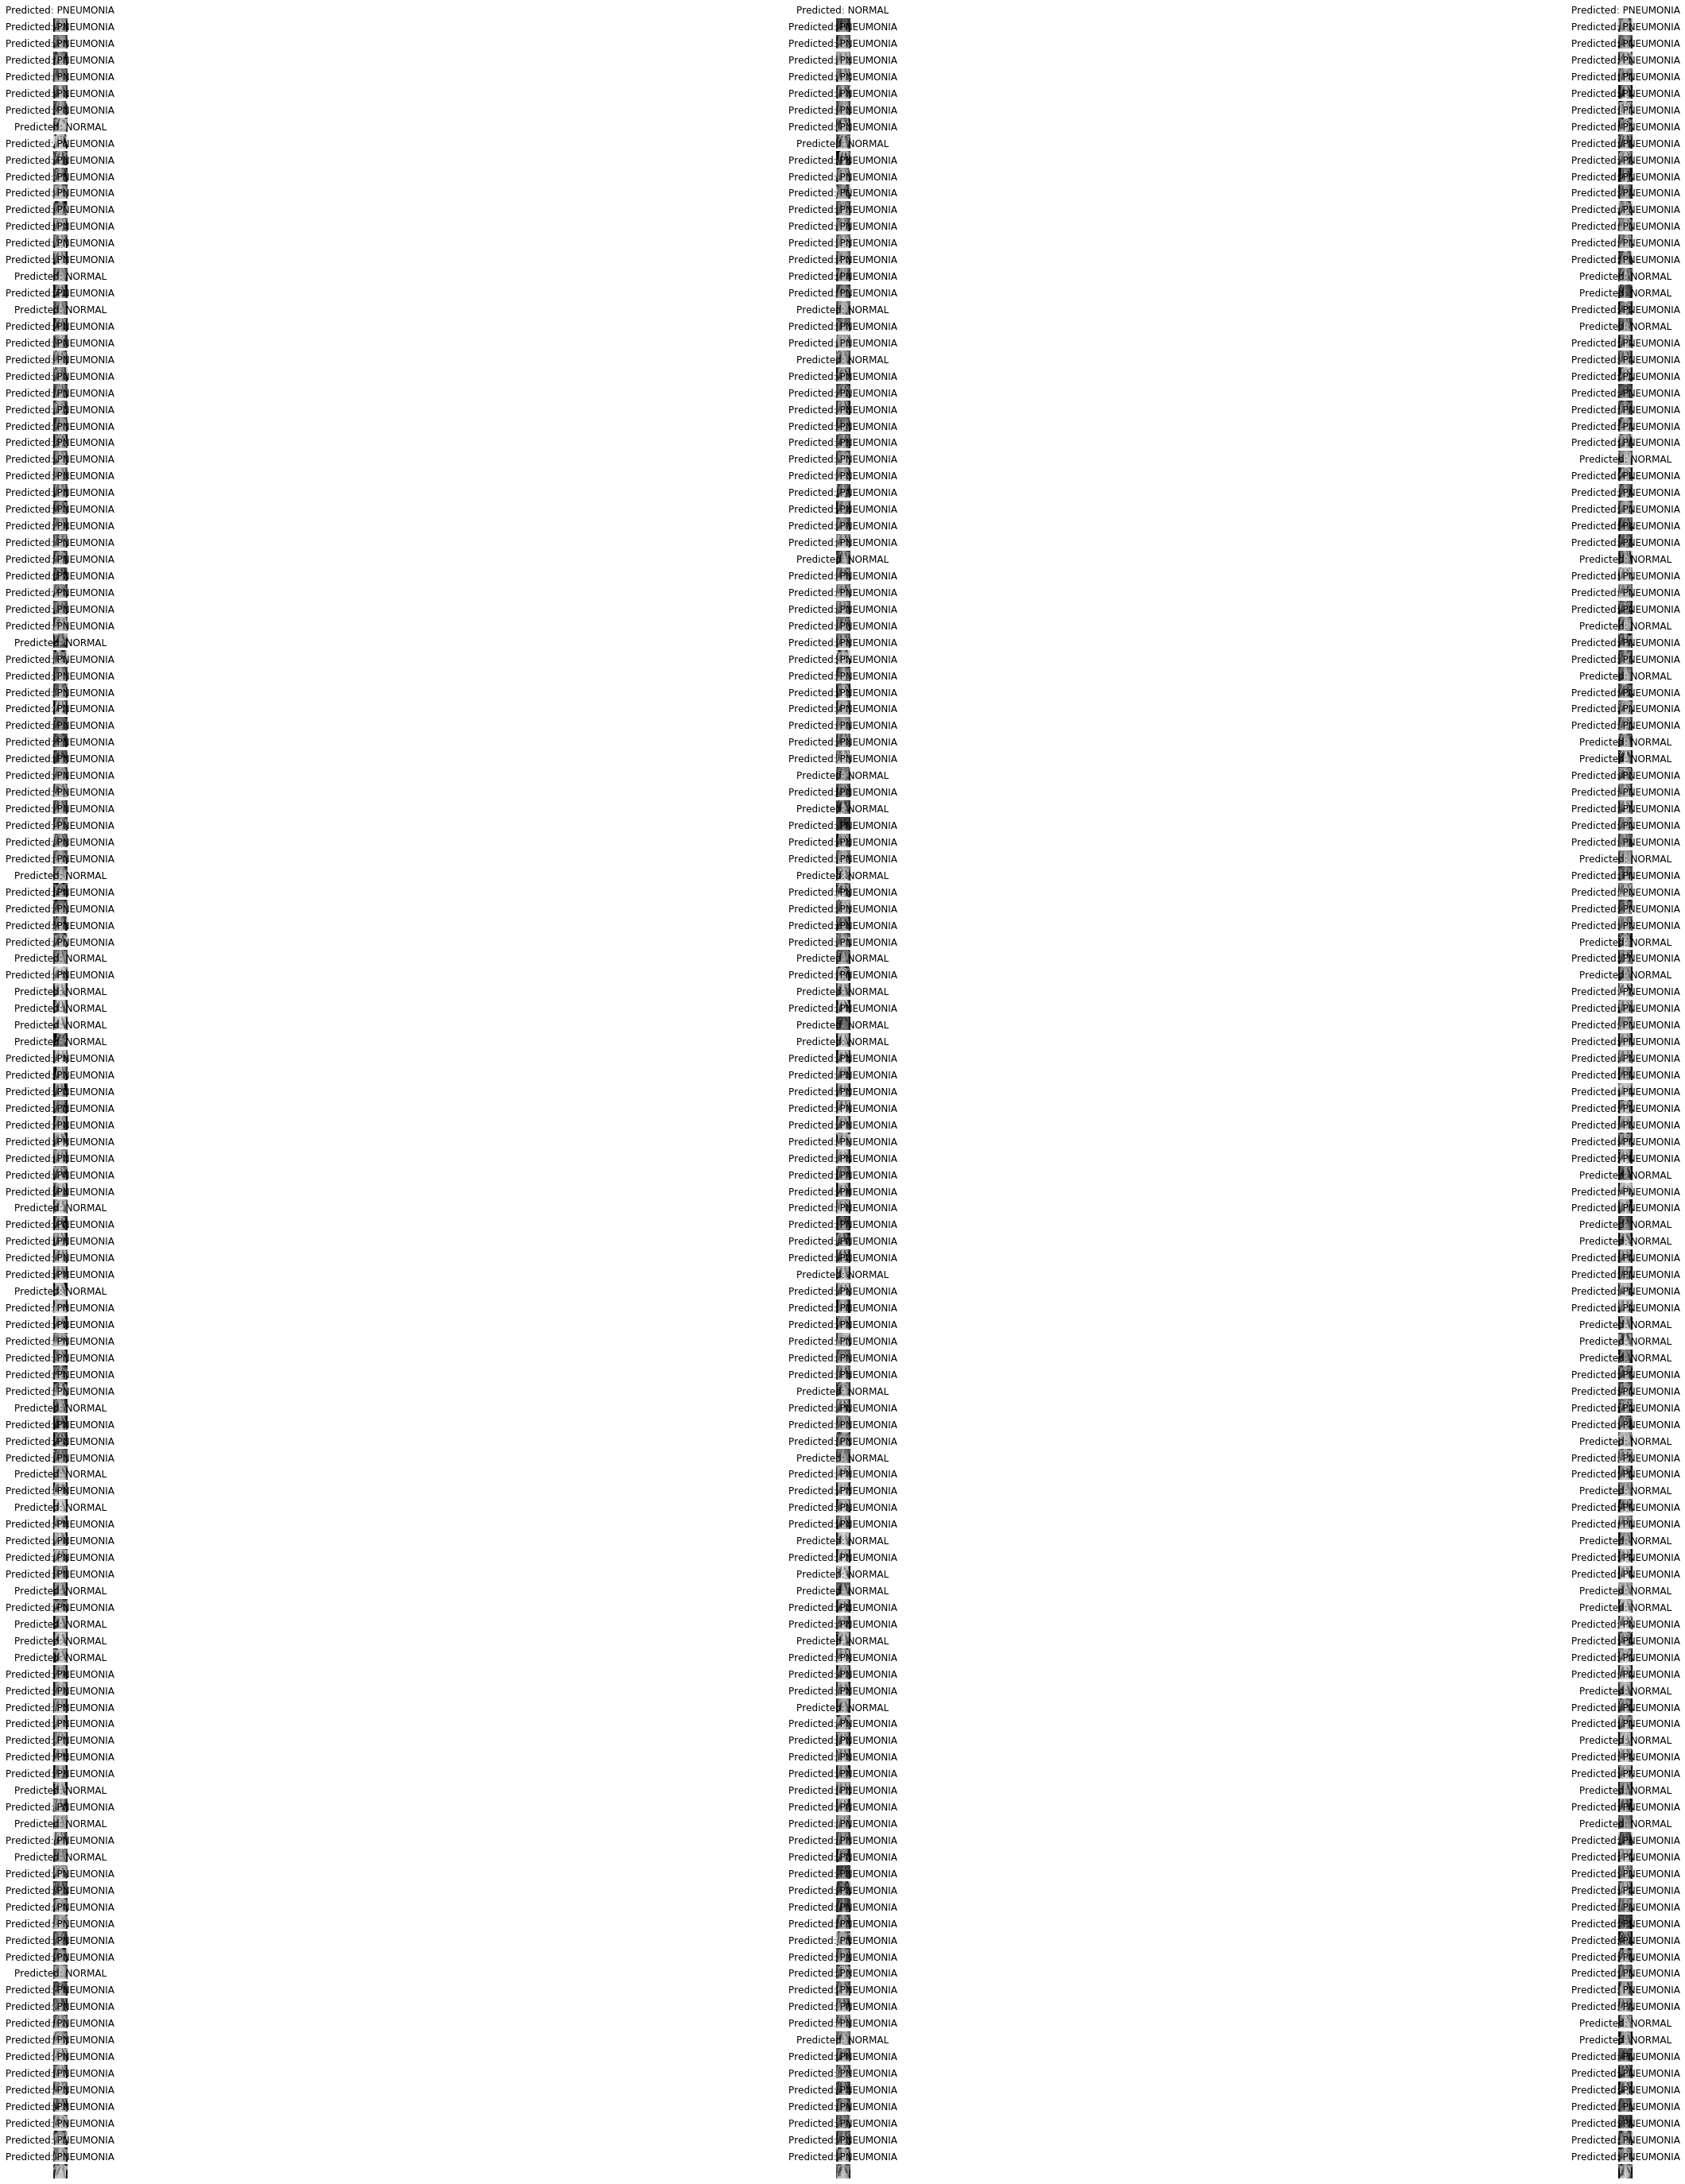

In [93]:
# Let's use our trained model to make some prediction on test examples

%matplotlib inline

plt.rcParams['figure.figsize'] = (50,50) # Make the figures a bit bigger
base_path = 'E:/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/'

classes = {0:'NORMAL', 1:'PNEUMONIA'} # Keras assigns integer ids (0,1,...) to class labels (NORMAL,pneumonia,...) alphabatecally
test_files = []
N=0;
P=0;
for x in os.listdir(base_path): 
    if (x.endswith('.jpeg')):
        test_files.append(x)
test_files.count

for i,x in enumerate(test_files):
    img = image.load_img(base_path + x, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    output = model.predict(x)
    
    plt.subplot(130,3,i+1)
    plt.imshow(img)
    plt.title("Predicted: {}".format(classes[int(output[0][0])]))
    plt.axis('off')
    if classes[int(output[0][0])]== "NORMAL":
        N=N+1
    else:
        P=P+1
print("PNEUMONIA:Correct",P,"mis-classified:",N)
print("accuracy:",((P*100)/(N+P)))

In [ ]:

from numpy import loadtxt
from tensorflow.keras.models import load_model

model.save("best_model.h5")
